<a id='top'></a>
# Challenge Set 8
Topic:        Classification  
Date:         8/8/2016  
Name:         Whitney Chia  
Worked with:  All by myyyyyyyself

[Question 1](#question1)   
[Question 2](#question2)   
[Question 3](#question3)   

<a id='question1'></a>
# Question 1   
[Top](#top)

In [1]:
# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from patsy import dmatrices
import statsmodels.api as sm
pd.options.display.max_rows = 999
plt.style.use('ggplot')
sns.set_context('poster')
sns.set_style('darkgrid')
sns.set_palette('dark')
import matplotlib.patches as mpatches

In [2]:
df = pd.read_csv('house-votes-84.data', header=None)

In [3]:
df.columns = ['Party','handicapped_infants', 'water_project_cost_sharing',\
        'adoption_of_the_budget_resolution', 'physician_fee_freeze', 'el_salvador_aid',\
             'religious_groups_in_schools', 'anti_satellite_test_ban', 'aid_to_nicaraguan_contras',\
             'mx_missile', 'immigration', 'synfuels_corporation_cutback', 'education_spending', 'superfund_right_to_sue',\
             'crime', 'duty_free_exports', 'export_administration_act_south_africa']
df = df.replace(['republican', 'democrat', 'y','n', '?'], [0,1,1,0, np.nan])
df = df.astype(float)
df = df.fillna(df.mean())

In [4]:
y, X = dmatrices('Party ~ handicapped_infants + water_project_cost_sharing\
        + adoption_of_the_budget_resolution + physician_fee_freeze + el_salvador_aid\
             + religious_groups_in_schools + anti_satellite_test_ban + aid_to_nicaraguan_contras\
             + mx_missile + immigration + synfuels_corporation_cutback + education_spending + superfund_right_to_sue\
             + crime + duty_free_exports + export_administration_act_south_africa', data=df, return_type='dataframe')

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [6]:
DTC = DecisionTreeClassifier()
DTC = DTC.fit(X, y)
pred = DTC.predict(X)
print 'the accuracy_score of Decision Tree is: ' + str(accuracy_score(y, pred))

the accuracy_score of Decision Tree is: 1.0


In [7]:
from sklearn.externals.six import StringIO  
import pydotplus
dot_data = StringIO() 
tree.export_graphviz(DTC, out_file=dot_data) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_pdf("House.pdf") 

True

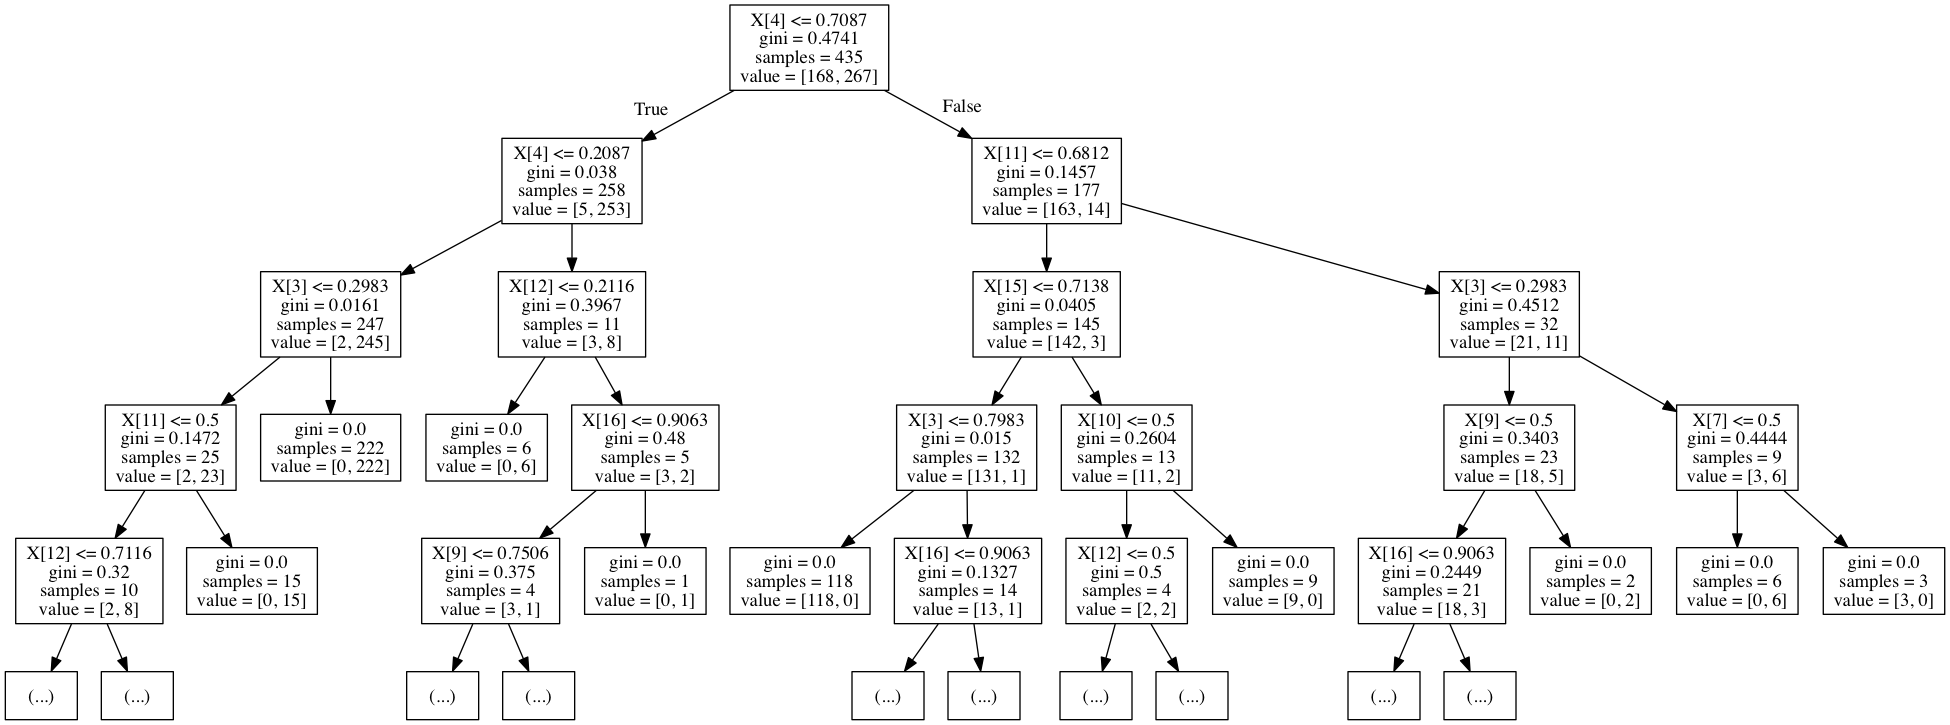

In [15]:
from IPython.display import Image  
dot_data = StringIO()  
tree.export_graphviz(DTC, out_file=dot_data,max_depth=4) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# <a id='question2'></a>
# Question 2   
[Top](#top)

In [9]:
df2 = pd.read_csv('2013_movies.csv')

In [10]:
df2.dropna()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00
5,Gravity,100000000.0,274092705,Alfonso Cuaron,PG-13,91,2013-10-04 00:00:00
8,Fast & Furious 6,160000000.0,238679850,Justin Lin,PG-13,130,2013-05-24 00:00:00
9,Oz The Great and Powerful,215000000.0,234911825,Sam Raimi,PG,127,2013-03-08 00:00:00
10,Star Trek Into Darkness,190000000.0,228778661,J.J. Abrams,PG-13,123,2013-05-16 00:00:00
11,Thor: The Dark World,170000000.0,206362140,Alan Taylor,PG-13,120,2013-11-08 00:00:00


In [11]:
df2.columns

Index([u'Title', u'Budget', u'DomesticTotalGross', u'Director', u'Rating',
       u'Runtime', u'ReleaseDate'],
      dtype='object')

In [12]:
y, X = dmatrices('DomesticTotalGross ~ Budget + Runtime + Rating', data=df2, return_type='dataframe')

In [13]:
DTC2 = DecisionTreeClassifier()
DTC2 = DTC2.fit(X, y)
pred = DTC2.predict(X)
print 'the accuracy_score of Decision Tree is: ' + str(accuracy_score(y, pred))

the accuracy_score of Decision Tree is: 1.0


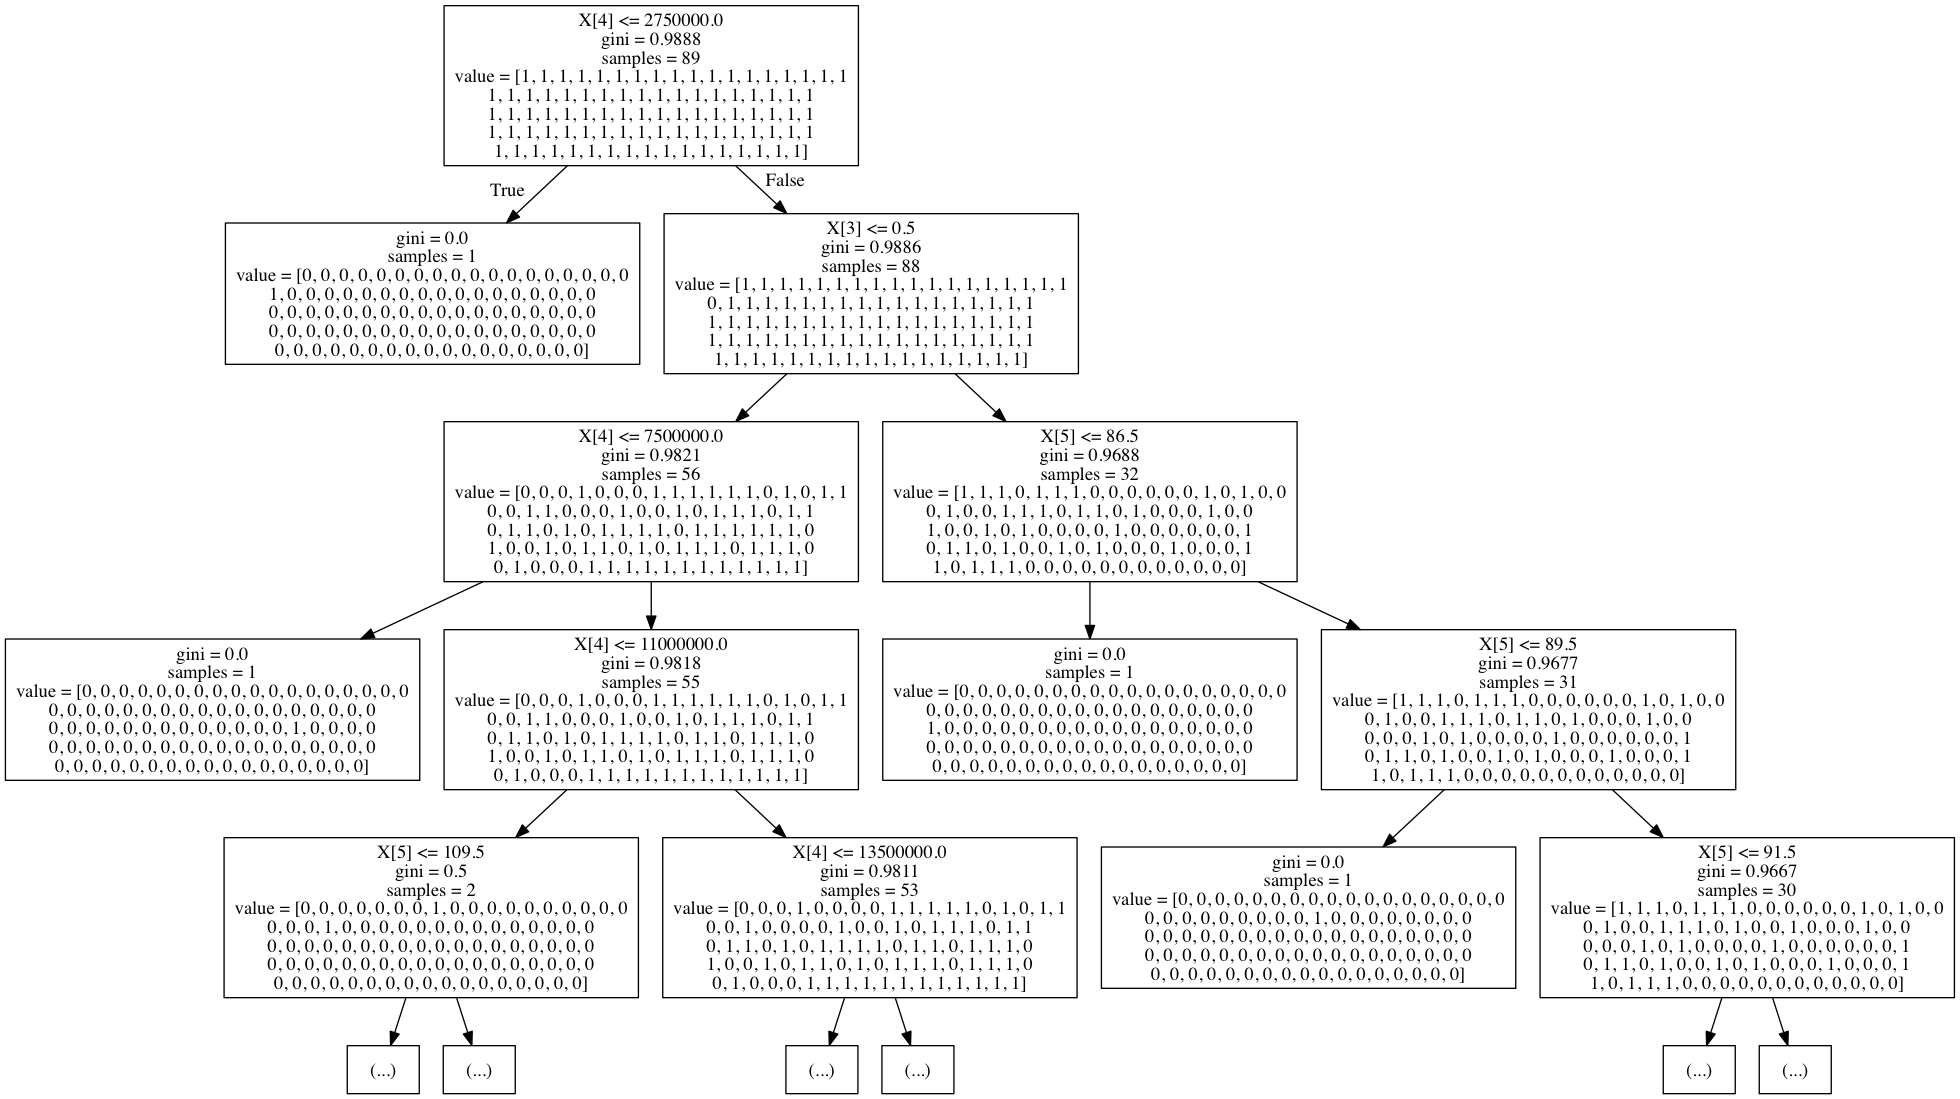

In [16]:
from IPython.display import Image  
dot_data = StringIO()  
tree.export_graphviz(DTC2, out_file=dot_data,max_depth=4)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

<a id='question3'></a>
# Question 3
[Top](#top)

In [17]:
df3 = pd.read_csv('titanic_train.csv')

In [18]:
df3 = df3.fillna(df.mean())

In [19]:
df3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
df3.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [21]:
y, X = dmatrices('Survived ~ Pclass + Sex + Age + Ticket + Fare + Cabin', data=df3, return_type='dataframe')

In [22]:
DTC3 = DecisionTreeClassifier()
DTC3 = DTC3.fit(X, y)
pred = DTC3.predict(X)
print 'the accuracy_score of Decision Tree is: ' + str(accuracy_score(y, pred))

the accuracy_score of Decision Tree is: 1.0


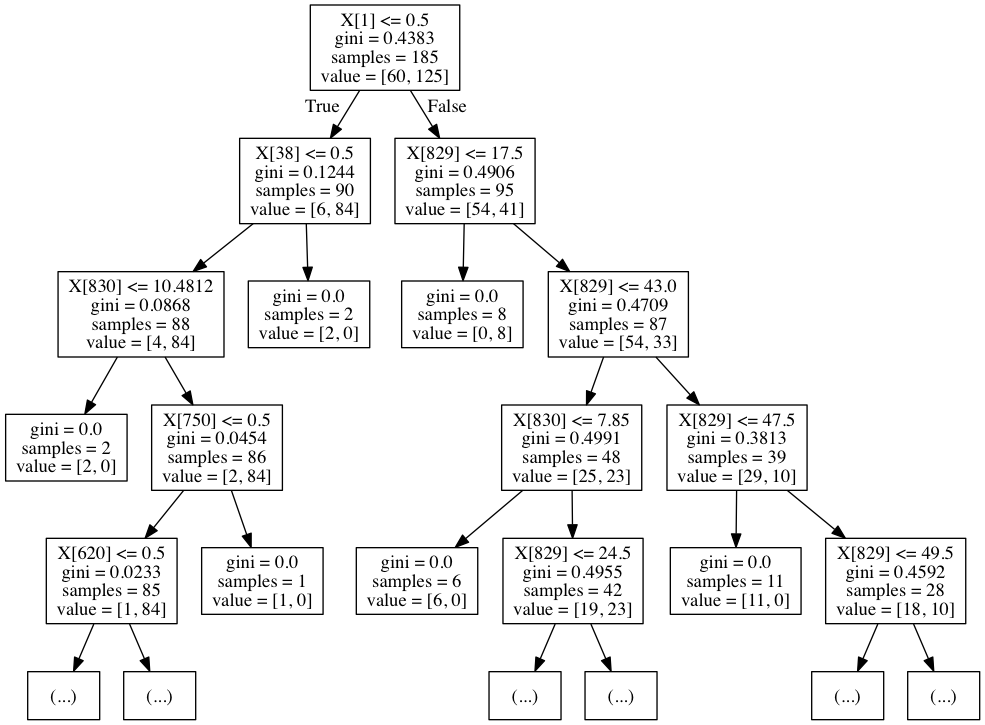

In [24]:
from IPython.display import Image  
dot_data = StringIO()  
tree.export_graphviz(DTC3, out_file=dot_data,max_depth=4)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())